# Simple pyosys synthesis example


Check dot version:

In [14]:
!dot -V

dot - graphviz version 2.40.1 (20161225.0304)


These are some auxiliaries for common test routines (run once):

In [2]:
from myhdl.conversion import yshelper
import graphviz

def design_from_entity(ent, async_reset = False):
    clk = Signal(bool())
    debug = Signal(bool(0))
    ce = Signal(bool())
    reset = ResetSignal(0, 1, isasync = async_reset)
    dout = Signal(intbv()[8:])
    a = ent(clk, ce, reset, dout, debug)
    name = ent.func.__name__

    design = yshelper.Design(name)

    # a.convert("verilog")
    a.convert("yosys_module", design, name=name, trace=True)

    return design

def to_svg(design):
    design.display_rtl()

    f = open(design.name + ".dot")
    dot_graph = f.read()

    return graphviz.Source(dot_graph)


Simple example of a XOR synthesis element:

Setting context <myhdl.conversion.yshelper.Design object at 0x7f58fd138cf8>
insert key test_8_8
INFER INTERFACE for test
Analyze signals for < Instance test >
New Name a <= a (a)
New Name b <= b (b)
WIRE clk <--- clk (clk)
CREATE Module: 'test'
INFER INTERFACE for test
Adding module with name: test_8_8
TOP LEVEL SIGNALS
a
b
---- DONE ----
# of block arguments: 2
ARG a
	Wire IN a, parent a, origin: None
ARG b
	Wire OUT (wire) b, parent: b, driver: test
----- PARENT/LOCAL CONTEXT -----
PARENT Wire a type <class 'myhdl._intbv.intbv'>, init: 0
PARENT Wire b type <class 'myhdl._intbv.intbv'>, init: 0
INTERNAL Wire clk type <class 'bool'>, init: 0
CONVERT_RTL instance 'test' 
CONVERT_RTL tree >>>>>> 'TEST_XOR_ASSIGN' 
dst: 8  src: 8
OUTPUTS of TEST_XOR_ASSIGN
	b
INPUTS
	a
VISIT INSTANCES
DONE instancing submodules
Display...


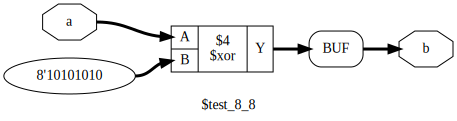

In [4]:
from myhdl.conversion import yshelper
from myhdl import *
import graphviz

@block
def test(a, b):
    @always_comb
    def xor_assign():
        b.next = a ^ 0xaa

    return instances()

a, b = [ Signal(intbv()[8:]) for i in range(2) ]

design = yshelper.Design("test")
inst = test(a, b)
inst.convert("yosys_module", design, name="test", trace=True)

display(to_svg(design))
